In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # used to split data set into (x, y) train and (x, y) test 
from sklearn.preprocessing import StandardScaler # used to transform data in to stadarization form
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df = pd.read_csv(r'/kaggle/input/salary-age-data-set/Social_Network_Ads.csv')
df
#this data set consederd classification problem 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [2]:
df.drop(columns=['User ID','Gender'], inplace=True)
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# train test spliting

In [3]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Purchased']), df['Purchased'], test_size=.3, random_state=0)

In [4]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [5]:
scaler = StandardScaler()

# used to learn the parametars and Compute the mean and std to be used for later scaling
scaler.fit(X=x_train)

# used to perform the standarization by centering and scaling
x_train_scaled = scaler.transform(X=x_train)
x_test_scaled = scaler.transform(X=x_test)

In [6]:
x_train_scaled = pd.DataFrame(data=x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(data=x_test_scaled, columns=x_test.columns)
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


# different between original data set and scaled data set

In [7]:
np.round(x_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [8]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of scaling

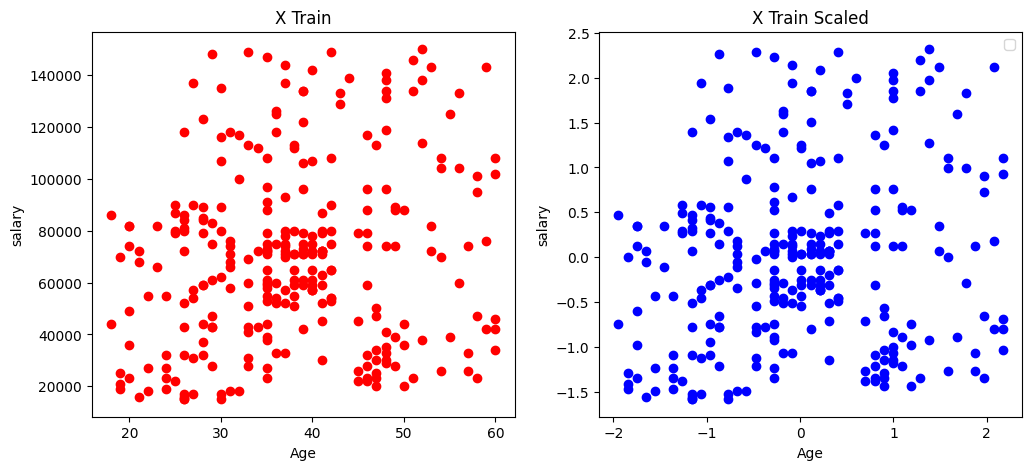

In [9]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

axs[0].scatter(
    x=x_train['Age'],
    y=x_train['EstimatedSalary'],
    color='red',
)
axs[0].set_xlabel('Age')
axs[0].set_ylabel('salary')
axs[0].set_title('X Train')

axs[1].scatter(
    x=x_train_scaled['Age'],
    y=x_train_scaled['EstimatedSalary'],
    color='blue',

)
axs[1].set_xlabel('Age')
axs[1].set_ylabel('salary')
axs[1].set_title('X Train Scaled')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

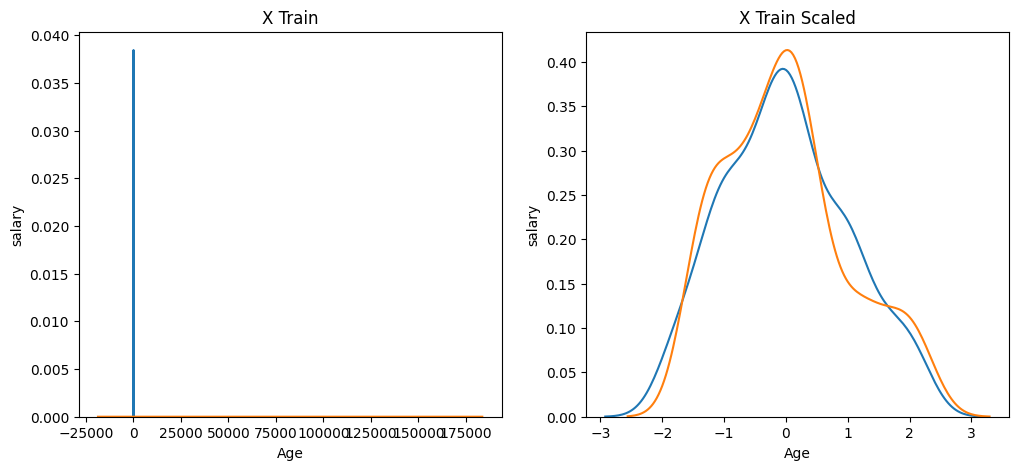

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

axs[0].set_xlabel('Age', )
axs[0].set_ylabel('salary')
axs[0].set_title('X Train')
sns.kdeplot(
    x=x_train['Age'],
    ax=axs[0]
)
sns.kdeplot(
    x=x_train['EstimatedSalary'],
    ax=axs[0]
)


axs[1].set_xlabel('Age')
axs[1].set_ylabel('salary')
axs[1].set_title('X Train Scaled')
sns.kdeplot(
    x=x_train_scaled['Age'],
    ax=axs[1]
)
sns.kdeplot(
    x=x_train_scaled['EstimatedSalary'],
    ax=axs[1]
)
plt.show()

# this show that the range of age column decreased, and that is what the standrization does

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


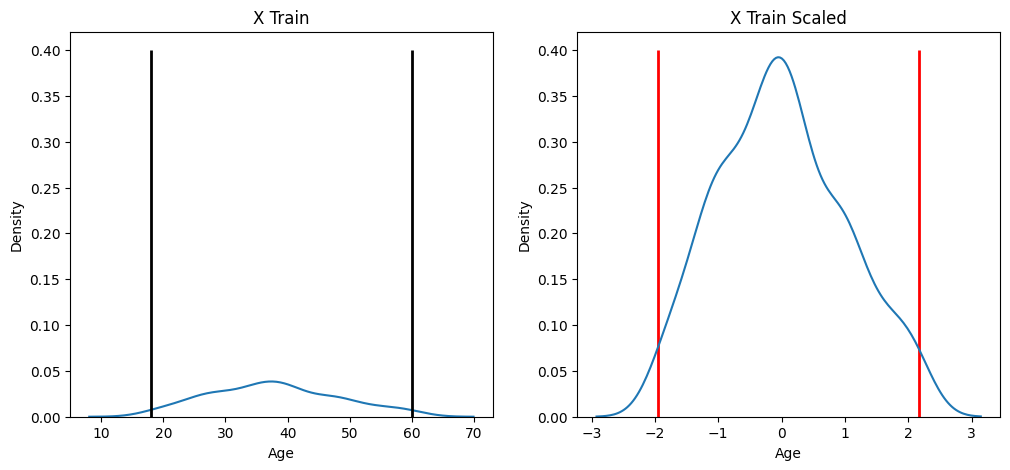

In [11]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

axs[0].set_xlabel('Age', )
axs[0].set_title('X Train')
sns.kdeplot(
    x=x_train['Age'],
    ax=axs[0]
)
axs[0].vlines(
    x_train['Age'].min(),
    color='black',
    linewidth=2,
    ymin=0,
    ymax=.4,
)
axs[0].vlines(
    x_train['Age'].max(),
    color='black',
    linewidth=2,
    ymin=0,
    ymax=.4,
)


axs[1].set_xlabel('Age')
axs[1].set_title('X Train Scaled')
axs[1].vlines(
    x_train_scaled['Age'].min(),
    color='red',
    linewidth=2,
    ymin=0,
    ymax=.4,
)
axs[1].vlines(
    x_train_scaled['Age'].max(),
    color='red',
    linewidth=2,
    ymin=0,
    ymax=.4,
)
sns.kdeplot(
    x=x_train_scaled['Age'],
    ax=axs[1]
)

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


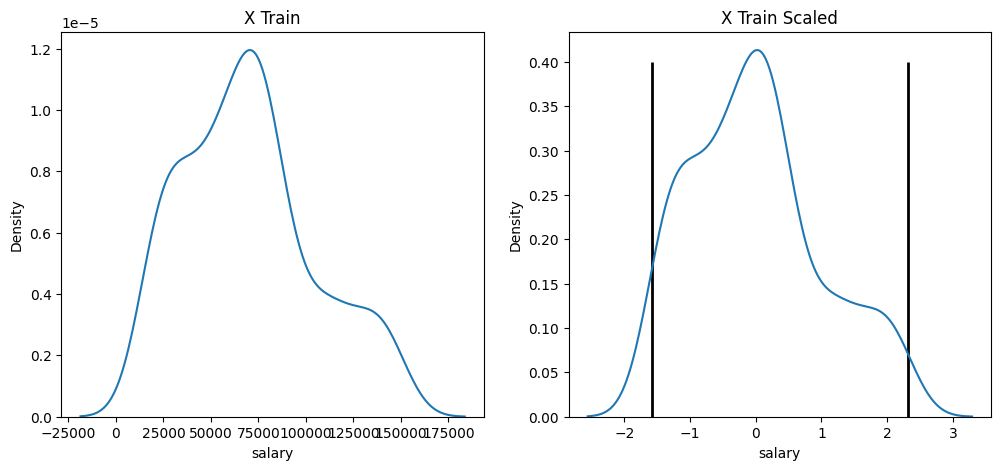

In [12]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

axs[0].set_xlabel('salary')
axs[0].set_title('X Train')


sns.kdeplot(
    x=x_train['EstimatedSalary'],
    ax=axs[0]
)



axs[1].set_xlabel('salary')
axs[1].set_title('X Train Scaled')
axs[1].vlines(
    x_train_scaled['EstimatedSalary'].min(),
    color='black',
    linewidth=2,
    ymin=0,
    ymax=.4,
)
axs[1].vlines(
    x_train_scaled['EstimatedSalary'].max(),
    color='black',
    linewidth=2,
    ymin=0,
    ymax=.4,
)

sns.kdeplot(
    x=x_train_scaled['EstimatedSalary'],
    ax=axs[1]
)
plt.show()

# The importance of scaling data by comparing the result of models accuracy

In [13]:
not_scaled_model = LogisticRegression()
scaled_model = LogisticRegression()

# trianing the both models 
not_scaled_model.fit(x_train,y_train)
scaled_model.fit(x_train_scaled,y_train)

LogisticRegression()

# get the prediction of each model

In [14]:
predict =        not_scaled_model.predict(x_test)
predict_scaled = scaled_model.predict(x_test_scaled)

In [15]:
print('accuracy_score of not scaled data set ',accuracy_score(y_test, predict) * 100 , '%')
print('accuracy_score of scaled data set',accuracy_score(y_test, predict_scaled) * 100 , '%')

accuracy_score of not scaled data set  65.83333333333333 %
accuracy_score of scaled data set 86.66666666666667 %


# when data not scaled the accuracy_score was about 66%, but with scaling it is about 87%

# The End